# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [51]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [52]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [53]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [54]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [55]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [56]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [57]:
print(df_hh_income)
print(df_pct_poverty)
print(df_pct_completed_hs)
print(df_share_race_city)
print(df_fatalities)

      Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns]
      Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1
2                  AL         Adamsville city         25.5
3                 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [58]:
print(df_hh_income.duplicated().sum())
print(df_pct_poverty.duplicated().sum())
print(df_pct_completed_hs.duplicated().sum())
print(df_share_race_city.duplicated().sum())
print(df_fatalities.duplicated().sum())

0
0
0
0
0


In [59]:
print(df_hh_income.isna().sum())
df_hh_income.fillna(0, inplace=True)

print(df_fatalities.isna().sum())
df_hh_income.fillna(0, inplace=True)

Geographic Area     0
City                0
Median Income      51
dtype: int64
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

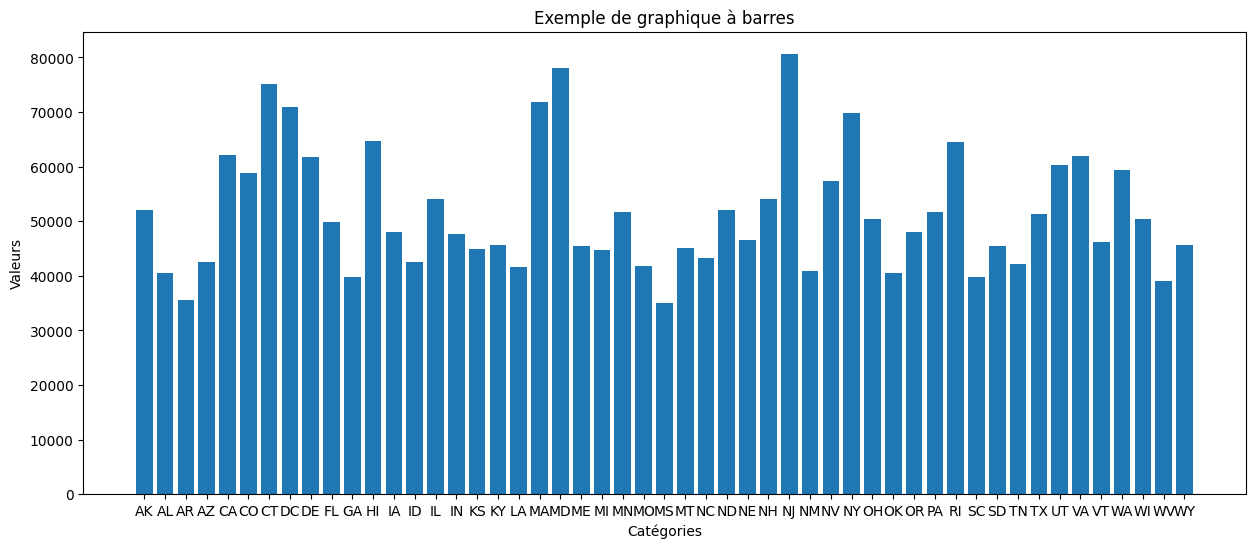

In [60]:
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"],errors='coerce')
df_hh_income_plot = df_hh_income[["Geographic Area","Median Income"]].groupby(['Geographic Area']).mean()

categories = df_hh_income_plot.index.tolist()
valeurs = df_hh_income_plot["Median Income"].tolist()

# Largeur totale du graphique
largeur_totale = 15  # Spécifiez la largeur totale souhaitée en pouces

# Création de la figure avec la largeur totale spécifiée
fig = plt.figure(figsize=(largeur_totale, 6))
plt.bar(categories, valeurs)
# Ajout de labels et de titres
plt.xlabel('Catégories')
plt.ylabel('Valeurs')
plt.title('Exemple de graphique à barres')

# Affichage du graphique
plt.show()

In [61]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

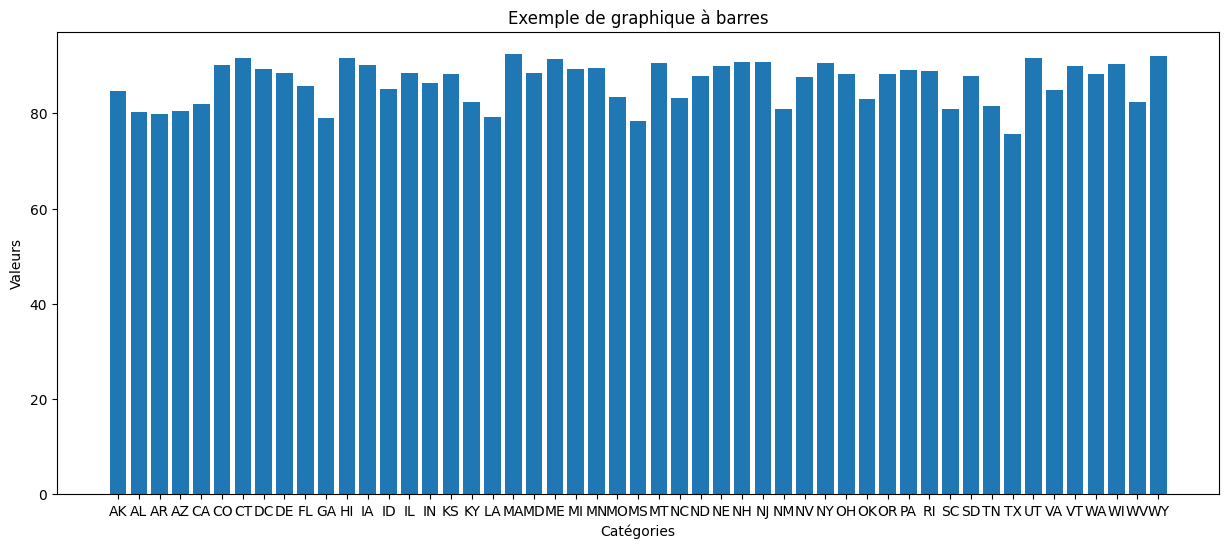

In [62]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"],errors='coerce')
df_pct_completed_hs_plot = df_pct_completed_hs[["Geographic Area","percent_completed_hs"]].groupby(['Geographic Area']).mean()

categories = df_pct_completed_hs_plot.index.tolist()
valeurs = df_pct_completed_hs_plot["percent_completed_hs"].tolist()

# Largeur totale du graphique
largeur_totale = 15  # Spécifiez la largeur totale souhaitée en pouces

# Création de la figure avec la largeur totale spécifiée
fig = plt.figure(figsize=(largeur_totale, 6))
plt.bar(categories, valeurs)
# Ajout de labels et de titres
plt.xlabel('Catégories')
plt.ylabel('Valeurs')
plt.title('Exemple de graphique à barres')

# Affichage du graphique
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

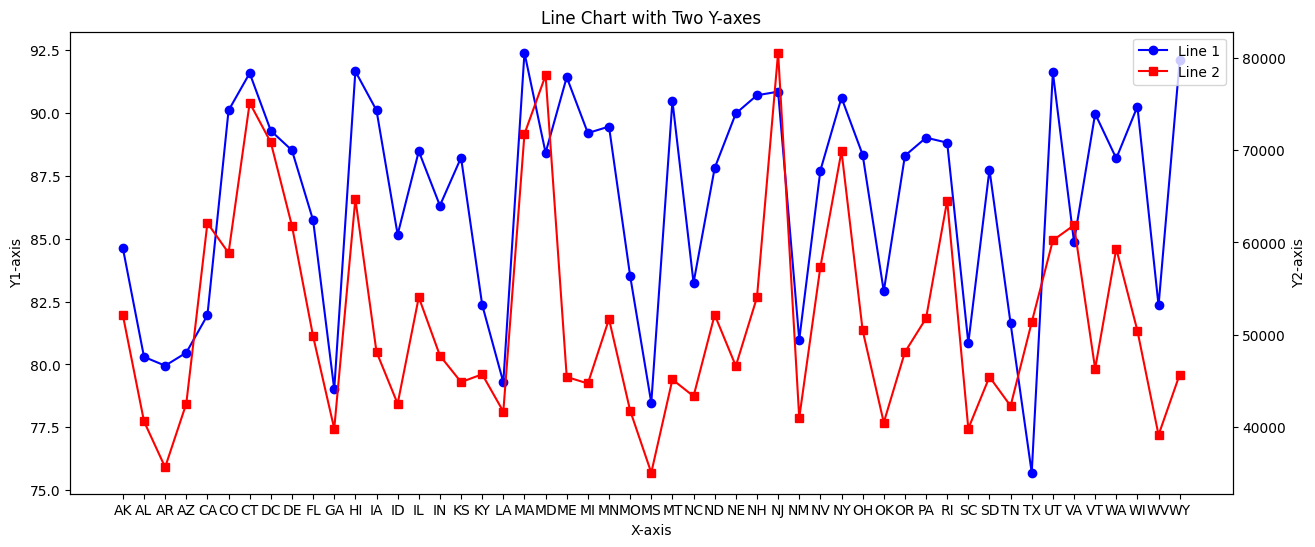

In [63]:
import matplotlib.pyplot as plt

df = pd.merge(df_pct_completed_hs_plot, df_hh_income_plot, on='Geographic Area')
# Data
categories = df_pct_completed_hs_plot.index.tolist()
valeurs_Hs = df_pct_completed_hs_plot["percent_completed_hs"].tolist()
valeurs_Income = df_hh_income_plot["Median Income"].tolist()
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create the first line plot
line1, = ax1.plot(categories, valeurs_Hs, color='blue', marker='o', label='Line 1')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y1-axis')
ax1.tick_params(axis='y')

# Create the second set of y-axes
ax2 = ax1.twinx()

# Create the second line plot
line2, = ax2.plot(categories, valeurs_Income, color='red', marker='s', label='Line 2')
ax2.set_ylabel('Y2-axis')
ax2.tick_params(axis='y')

# Combine the legends from both line plots
lines = [line1, line2]
labels = [line.get_label() for line in lines]

plt.legend(lines, labels)

# Largeur totale du graphique

# Set title and display the chart
plt.title('Line Chart with Two Y-axes')
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

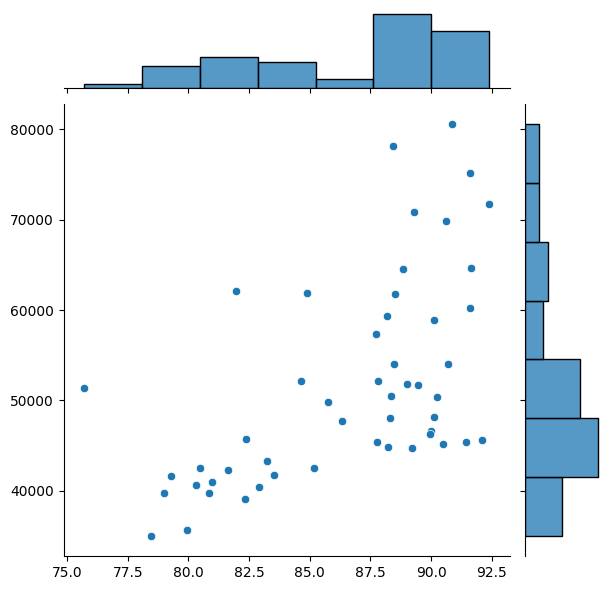

In [64]:

sns.jointplot(x=valeurs_Hs, y=valeurs_Income)


<Axes: >

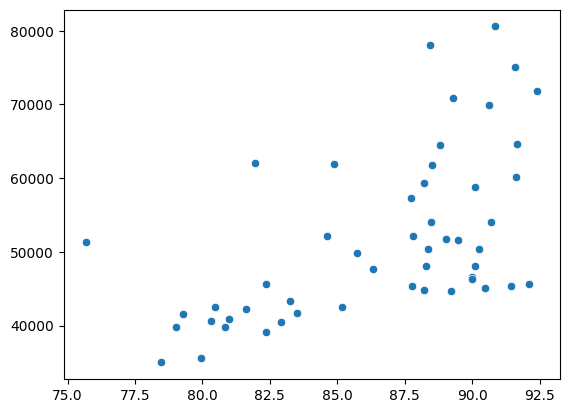

In [65]:
sns.scatterplot(x=valeurs_Hs, y=valeurs_Income)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

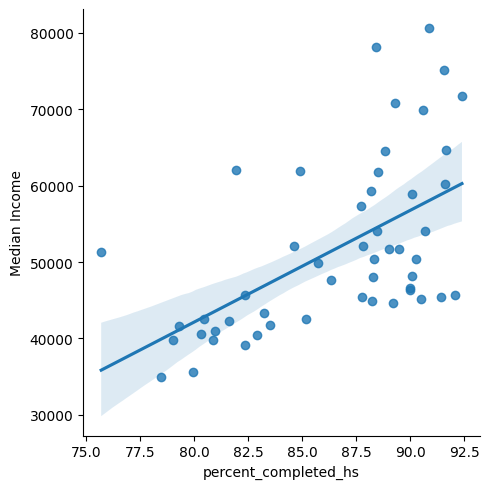

In [66]:
sns.lmplot(df,x="percent_completed_hs",y="Median Income")

<Axes: xlabel='percent_completed_hs', ylabel='Median Income'>

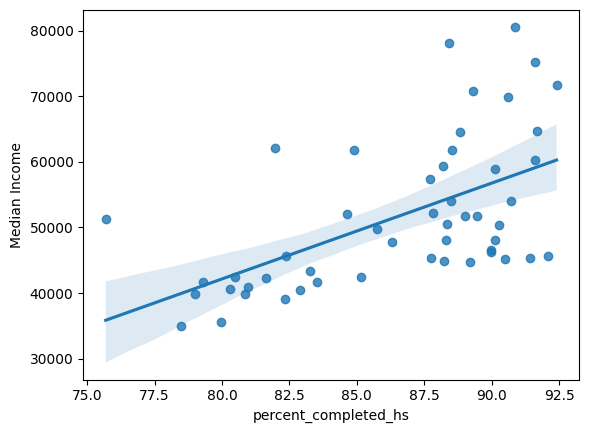

In [67]:
sns.regplot(df,x="percent_completed_hs",y="Median Income")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [72]:
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'],errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'],errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'],errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'],errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'],errors='coerce')
df_share_race_state =df_share_race_city[["Geographic area",'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].groupby("Geographic area").mean()
df_share_race_state

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65
CO,87.77,0.92,1.62,1.15,17.90
CT,86.11,4.99,0.66,2.99,7.98
DC,38.50,50.70,0.30,3.50,9.10
DE,76.25,15.39,0.52,2.00,7.42


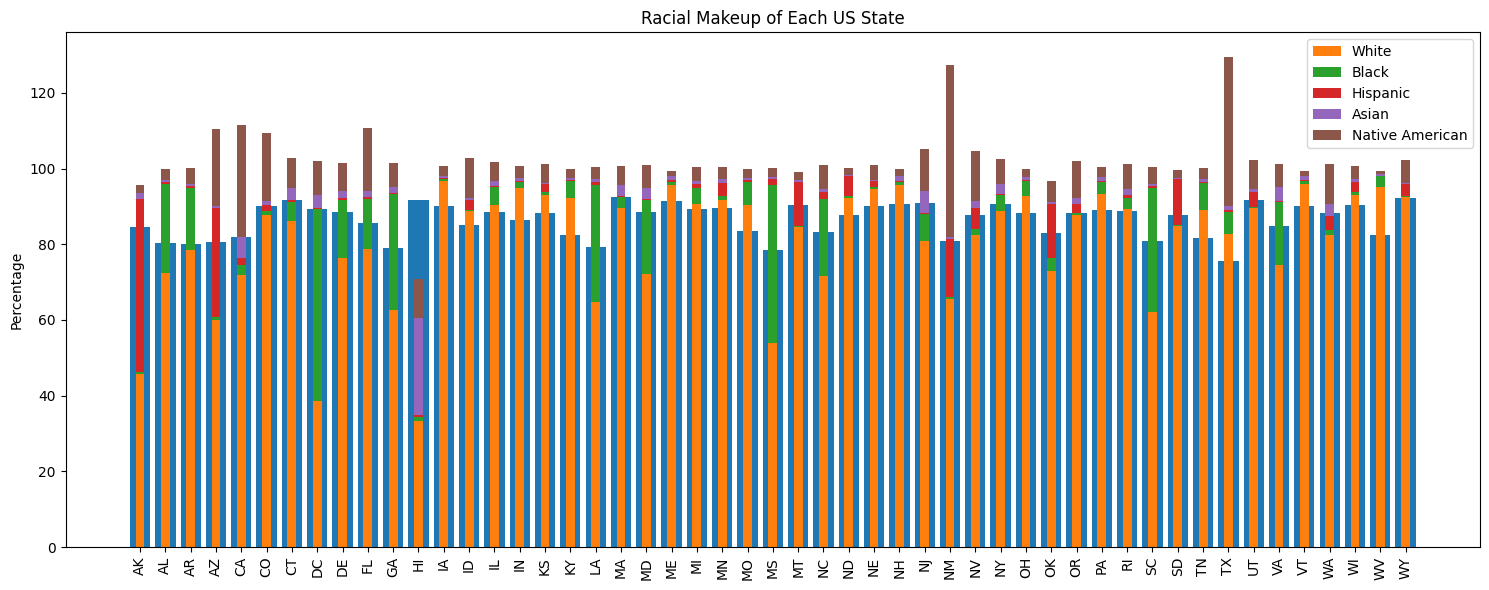

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Data
states = df_share_race_state.index  # Replace with the list of all US states
white_population = df_share_race_state['share_white']  # Percentage of white population
black_population = df_share_race_state['share_black']  # Percentage of black population
hispanic_population = df_share_race_state['share_native_american']  # Percentage of hispanic population
asian_population = df_share_race_state['share_asian']  # Percentage of asian population
native_american_population = df_share_race_state['share_hispanic']  # Percentage of native american population

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(states))

# Create the bar chart

# Largeur totale du graphique
largeur_totale = 15  # Spécifiez la largeur totale souhaitée en pouces

# Création de la figure avec la largeur totale spécifiée
fig = plt.figure(figsize=(largeur_totale, 6))
plt.bar(categories, valeurs)
# Ajout de labels et de titres
plt.bar(bar_positions, white_population, width=bar_width, label='White')
plt.bar(bar_positions, black_population, width=bar_width, label='Black', bottom=white_population)
plt.bar(bar_positions, hispanic_population, width=bar_width, label='Hispanic', bottom=np.add(white_population, black_population))
plt.bar(bar_positions, asian_population, width=bar_width, label='Asian', bottom=np.add(np.add(white_population, black_population), hispanic_population))
plt.bar(bar_positions, native_american_population, width=bar_width, label='Native American', bottom=np.add(np.add(np.add(white_population, black_population), hispanic_population), asian_population))

# Set the x-axis tick labels to the state names
plt.xticks(bar_positions, states, rotation='vertical')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Racial Makeup of Each US State')

# Display the legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).